# Get S&P 500 list from Wikipedia

-----------

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

-----------------------
## 1. Get and clean data

### Get Dow Jones list from wikipedia

In [2]:
url= r"https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables= pd.read_html(url, match= r'Symbol')

In [3]:
# There should be only one table.
print(len(tables))

2


In [4]:
sp500= tables[0]
sp500.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


### Clean columns

In [5]:
sp500.rename(columns= {'Security':'name', 'Symbol':'ticker', 'GICS Sector':'industry', 'GICS Sub-Industry': 'sub-industry', 'Date first added': 'date_added', 'CIK':'cik', 'Founded': 'found_year'}, inplace= True)
sp500.drop(columns= ['SEC filings', 'Headquarters Location'], inplace= True)

In [6]:
sp500.head()

,ticker,name,industry,sub-industry,date_added,cik,found_year
0,MMM,3M,Industrials,Industrial Conglomerates,1976-08-09,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,1964-03-31,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,2018-05-31,815094,1981


In [7]:
sp500.dtypes

ticker          object
name            object
industry        object
sub-industry    object
date_added      object
cik              int64
found_year      object
dtype: object

------------------
## 2. Navigate data

### Check distribution by industries

In [8]:
sp500.groupby('industry')[['ticker']].count().sort_values('ticker', ascending= False)

,ticker
industry,
Information Technology,74
Industrials,73
Financials,66
Health Care,64
Consumer Discretionary,58
Consumer Staples,33
Real Estate,31
Utilities,29
Materials,28


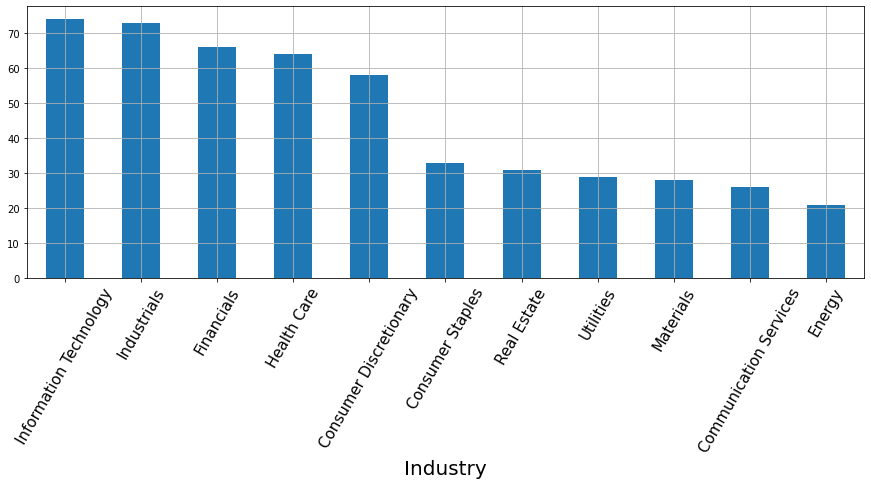

In [9]:
sp500.groupby('industry')[['ticker']].count().sort_values('ticker', ascending= False). \
    plot(kind='bar', figsize= (15,5), grid= True, legend= False)
plt.xticks(rotation=60, fontsize=15)
plt.xlabel('Industry', fontsize= 20)
plt.show()

---------

## Interactive figure: Click any industry to see its composition!
- Visualize the structure of industry - sub-industry - company name

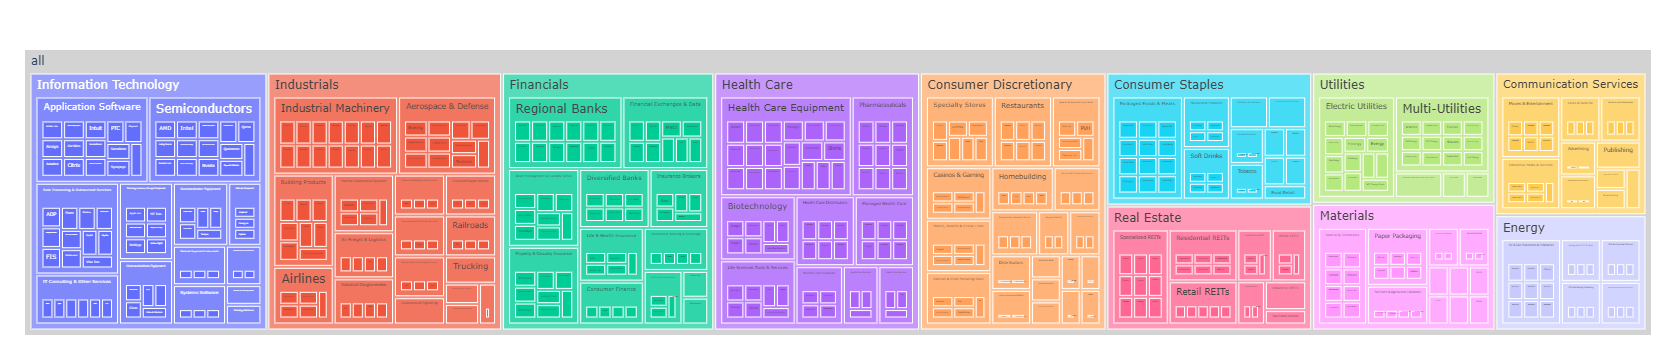

In [40]:
fig = px.treemap(data_frame= sp500, path=[px.Constant("all"), 'industry', 'sub-industry','name'], hover_name= 'name')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## 3. Save as csv

In [12]:
sp500.to_csv('sp500.csv')

In [26]:
sp500.head()

,ticker,name,industry,sub-industry,date_added,cik,found_year
0,MMM,3M,Industrials,Industrial Conglomerates,1976-08-09,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,1964-03-31,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,2018-05-31,815094,1981


-------

In [1]:
! jupyter nbconvert SP500.ipynb --to html

[NbConvertApp] Converting notebook SP500.ipynb to html
[NbConvertApp] Writing 733474 bytes to SP500.html
